In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import os
import shutil
import random

# Define paths
source_folder = '/content/drive/MyDrive/Bike Dataset'  # The folder where all images are located
base_dir = '/content/drive/MyDrive/bike_dataset'  # The base directory where train/val/test folders will be created

# Create train/validation/test folders
for folder in ['train', 'validation', 'test']:
    os.makedirs(os.path.join(base_dir, folder, 'Damaged'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, folder, 'Not_Damaged'), exist_ok=True)

# Get all images from the source folder
all_images = os.listdir(source_folder)

# Separate images into Damaged and Not Damaged categories (you can adjust this according to your image names)
damaged_images = [img for img in all_images if 'damagedb' in img.lower()]
not_damaged_images = [img for img in all_images if 'nd_bike' in img.lower()]

# Function to split dataset
def split_and_copy(images, category, train_ratio=0.7, validation_ratio=0.15):
    random.shuffle(images)
    total_images = len(images)

    train_cutoff = int(total_images * train_ratio)
    val_cutoff = int(total_images * (train_ratio + validation_ratio))

    # Training set
    for img in images[:train_cutoff]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(base_dir, 'train', category, img))

    # Validation set
    for img in images[train_cutoff:val_cutoff]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(base_dir, 'validation', category, img))

    # Test set
    for img in images[val_cutoff:]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(base_dir, 'test', category, img))

# Split and copy Damaged images
split_and_copy(damaged_images, 'Damaged')

# Split and copy Not Damaged images
split_and_copy(not_damaged_images, 'Not_Damaged')

print("Dataset split successfully!")'''


'import os\nimport shutil\nimport random\n\n# Define paths\nsource_folder = \'/content/drive/MyDrive/Bike Dataset\'  # The folder where all images are located\nbase_dir = \'/content/drive/MyDrive/bike_dataset\'  # The base directory where train/val/test folders will be created\n\n# Create train/validation/test folders\nfor folder in [\'train\', \'validation\', \'test\']:\n    os.makedirs(os.path.join(base_dir, folder, \'Damaged\'), exist_ok=True)\n    os.makedirs(os.path.join(base_dir, folder, \'Not_Damaged\'), exist_ok=True)\n\n# Get all images from the source folder\nall_images = os.listdir(source_folder)\n\n# Separate images into Damaged and Not Damaged categories (you can adjust this according to your image names)\ndamaged_images = [img for img in all_images if \'damagedb\' in img.lower()]\nnot_damaged_images = [img for img in all_images if \'nd_bike\' in img.lower()]\n\n# Function to split dataset\ndef split_and_copy(images, category, train_ratio=0.7, validation_ratio=0.15):\n    

In [ ]:
# Image augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# For validation and test data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load your dataset (ensure you have 'Damaged' and 'Not Damaged' directories)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/train',  # Path to your training dataset
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,
    class_mode='categorical'  # 2 classes: 'Damaged' and 'Not Damaged'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/validation',  # Path to your validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 32 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers of the model
base_model.trainable = False

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(2, activation='softmax')(x)  # Output layer for binary classification

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=10,  # Number of epochs (you can increase this if needed)
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.5000 - loss: 1.0567 - val_accuracy: 0.5000 - val_loss: 36.7633
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 35.8134 - val_accuracy: 0.5000 - val_loss: 25.2964
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 24.2029 - val_accuracy: 0.5000 - val_loss: 7.2573
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 6.0116 - val_accuracy: 0.5000 - val_loss: 0.7181
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.7217 - val_accuracy: 0.5000 - val_loss: 0.7361
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 0.7408 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.7407
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.7135 - val_accuracy: 0.6667 - val_loss: 0.7033


In [ ]:
# Unfreeze the base model layers for fine-tuning
base_model.trainable = True

# Compile again with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 82s 82s/step - accuracy: 0.3750 - loss: 1.1119 - val_accuracy: 0.5000 - val_loss: 0.7257
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 0.5938 - loss: 0.8359 - val_accuracy: 0.5000 - val_loss: 0.7242
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.6562 - loss: 0.8915 - val_accuracy: 0.5000 - val_loss: 0.7246
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 0.7188 - loss: 0.6434 - val_accuracy: 0.5000 - val_loss: 0.7252
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 0.6562 - loss: 0.6296 - val_accuracy: 0.5000 - val_loss: 0.7258


In [ ]:
# Load test dataset
test_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/test',  # Path to your test dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


Found 8 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 0.7201
Test Accuracy: 0.375


In [ ]:
'''# Save the model to Google Drive
model.save('/content/drive/MyDrive/bike_damage_classifier.keras')'''


"# Save the model to Google Drive\nmodel.save('/content/drive/MyDrive/bike_damage_classifier.keras')"

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess an image for prediction
img_path = '/content/drive/MyDrive/Bike Dataset/damagedb21.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = train_generator.class_indices  # Get class labels

# Map the predicted class to 'Damaged' or 'Not Damaged'
for label, index in class_labels.items():
    if index == predicted_class:
        print(f"Predicted Class: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Not_Damaged


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


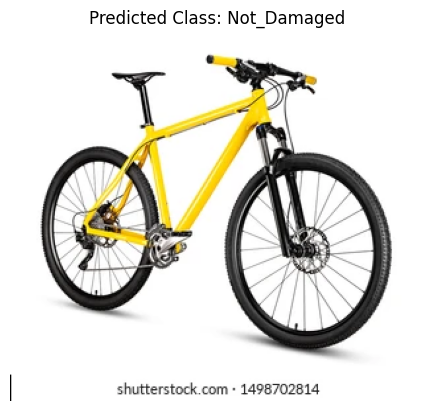

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess an image for prediction
img_path = '/content/drive/MyDrive/Bike Dataset/damagedb21.jpg'  # Path to the image to be predicted
img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 pixels
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image to [0, 1]

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Get the class labels
class_labels = train_generator.class_indices  # Get class labels from training generator

# Map the predicted class index to class label
for label, index in class_labels.items():
    if index == predicted_class:
        predicted_label = label

# Display the image and the predicted label
plt.imshow(image.load_img(img_path))  # Display the image
plt.title(f"Predicted Class: {predicted_label}")  # Display the prediction as the title
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


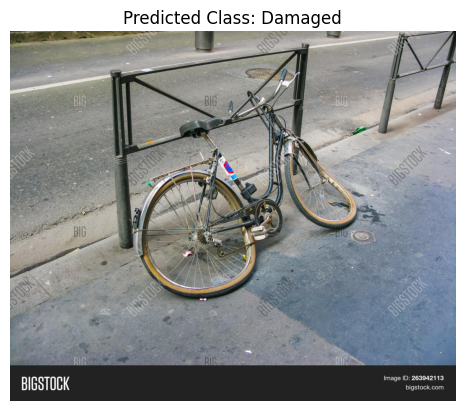

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess an image for prediction
img_path = '/content/drive/MyDrive/bike_dataset/predictionimgs/bbpi2.jpg'  # Path to the image to be predicted
img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 pixels
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image to [0, 1]

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Get the class labels
class_labels = train_generator.class_indices  # Get class labels from training generator

# Map the predicted class index to class label
for label, index in class_labels.items():
    if index == predicted_class:
        predicted_label = label

# Display the image and the predicted label
plt.imshow(image.load_img(img_path))  # Display the image
plt.title(f"Predicted Class: {predicted_label}")  # Display the prediction as the title
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()


Found 8 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


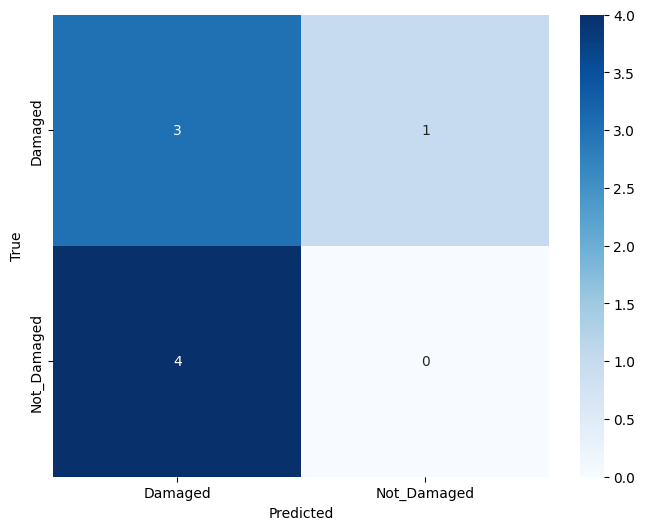

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the test data generator
validation_datagen = ImageDataGenerator(rescale=1./255)  # Normalizing the pixel values between 0 and 1

# Load the test dataset
test_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/test',  # Path to your test dataset
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',  # Assuming binary classification (Damaged/Not Damaged)
    shuffle=False  # Important to set shuffle=False to ensure proper alignment of true and predicted labels
)

# Get the true labels from the test generator
y_true = test_generator.classes

# Make predictions on the test data
y_pred = model.predict(test_generator)

# Convert predicted probabilities to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Found 32 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Training class distribution: {'Damaged': np.int64(16), 'Not_Damaged': np.int64(16)}
Validation class distribution: {'Damaged': np.int64(3), 'Not_Damaged': np.int64(3)}
Test class distribution: {'Damaged': np.int64(4), 'Not_Damaged': np.int64(4)}

=== Initial Training ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.5312 - loss: 1.1767 - precision: 0.5312 - recall: 0.5312

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.5312 - loss: 1.1767 - precision: 0.5312 - recall: 0.5312 - val_accuracy: 0.5000 - val_loss: 0.8213 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 1.0124 - precision: 0.5000 - recall: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.9454 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5625 - loss: 0.8292 - precision: 0.5625 - recall: 0.5625 - val_accuracy: 0.5000 - val_loss: 0.7879 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6250 - loss: 0.8812 - precision: 0.6250 - recall: 0.6250

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.6250 - loss: 0.8812 - precision: 0.6250 - recall: 0.6250 - val_accuracy: 0.6667 - val_loss: 0.7188 - val_precision: 0.6667 - val_recall: 0.6667 - learning_rate: 0.0010
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4688 - loss: 0.8390 - precision: 0.4688 - recall: 0.4688 - val_accuracy: 0.5000 - val_loss: 0.8435 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 0.8554 - precision: 0.5000 - recall: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.9273 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5312 - loss: 0.8696 - precision: 0.5312 - recall: 0.5312 - val_accuracy: 0.5000 - val_loss: 0.8664 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.9378 - pr


=== Test Evaluation ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 0.6954 - precision: 0.5000 - recall: 0.5000
Test Accuracy: 50.00%
Test Precision: 50.00%
Test Recall: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Classification Report:
              precision    recall  f1-score   support

     Damaged       0.50      0.25      0.33         4
 Not_Damaged       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



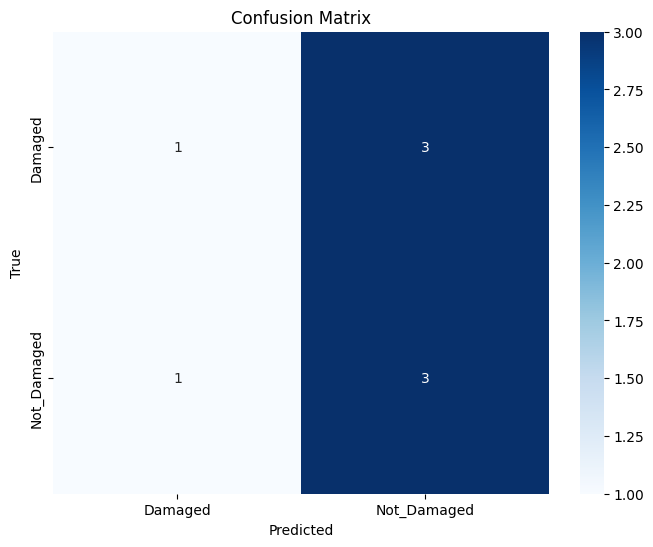

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


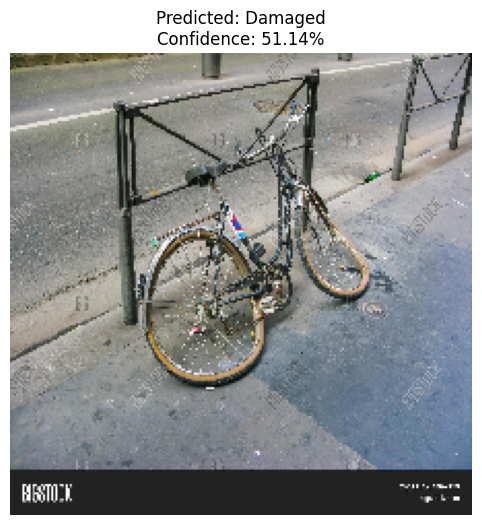

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=bicycle_damage_detector.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# ======================
# 1. DATA PREPARATION
# ======================

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/bike_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Correct class distribution function
def get_class_distribution(generator):
    unique, counts = np.unique(generator.classes, return_counts=True)
    return dict(zip(generator.class_indices.keys(), counts))

# Print class distribution
print("Training class distribution:", get_class_distribution(train_generator))
print("Validation class distribution:", get_class_distribution(validation_generator))
print("Test class distribution:", get_class_distribution(test_generator))

# ======================
# 2. MODEL BUILDING
# ======================

# Load pre-trained ResNet50 with improved settings
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg'  # Better than flatten for feature extraction
)

# Freeze base model
base_model.trainable = False

# Custom head
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

# ======================
# 3. MODEL TRAINING
# ======================

# Initial training
print("\n=== Initial Training ===")
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=callbacks
)

# Fine-tuning
print("\n=== Fine-Tuning ===")
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_generator,
    epochs=10,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    callbacks=callbacks
)

# ======================
# 4. EVALUATION
# ======================

# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
print("\n=== Test Evaluation ===")
test_results = model.evaluate(test_generator)
print(f"Test Accuracy: {test_results[1]:.2%}")
print(f"Test Precision: {test_results[2]:.2%}")
print(f"Test Recall: {test_results[3]:.2%}")

# Classification report
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ======================
# 5. VISUALIZATION & PREDICTION
# ======================

def predict_and_visualize(model, img_path, class_names):
    """Make prediction and visualize results"""
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediction
    preds = model.predict(img_array)
    pred_class = np.argmax(preds)
    confidence = np.max(preds)

    # Visualization
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[pred_class]}\nConfidence: {confidence:.2%}")
    plt.axis('off')
    plt.show()

    return pred_class, confidence

# Example usage
class_names = {v:k for k,v in train_generator.class_indices.items()}
sample_image = '/content/drive/MyDrive/bike_dataset/predictionimgs/bbpi2.jpg'
pred_class, confidence = predict_and_visualize(model, sample_image, class_names)

# ======================
# 6. MODEL DEPLOYMENT
# ======================

# Save final model in TensorFlow format
model.save('bicycle_damage_detector')

# Convert to TFLite for mobile deployment
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('bicycle_damage_detector.tflite', 'wb') as f:
    f.write(tflite_model)

print("\n=== Model saved in multiple formats ===")
print("- Keras format (.h5)")
print("- TensorFlow SavedModel format")
print("- TFLite format for mobile deployment")